In [5]:
#matplotlib ipympl
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import os

In [2]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

10000


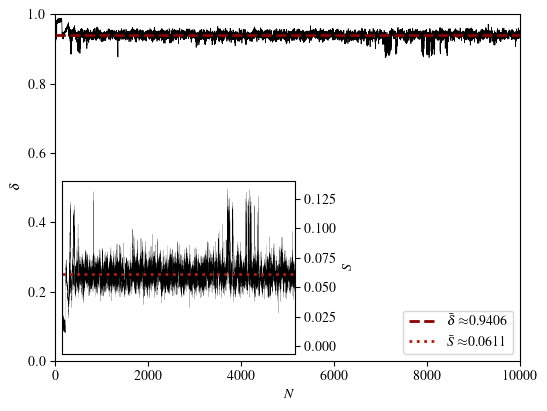

In [ ]:
D = 101
n_qubits = 2
filename = "seed_qsum.txt"
cwd = os.getcwd()
Qsums = np.genfromtxt(cwd+"/data/sums/"+filename, usecols = 0, delimiter=",", dtype = float)
T = Qsums.size
print(T)
normQsums = ((3/4)**n_qubits) * Qsums
entropy = - np.log(Qsums)
normentropy = - np.log(normQsums)
t = np.arange(0,T)
avg = np.average(normQsums[50:])
avgS = np.average(normentropy)
variance = np.var(normQsums[50:])
entropy_variance = np.var(normentropy)

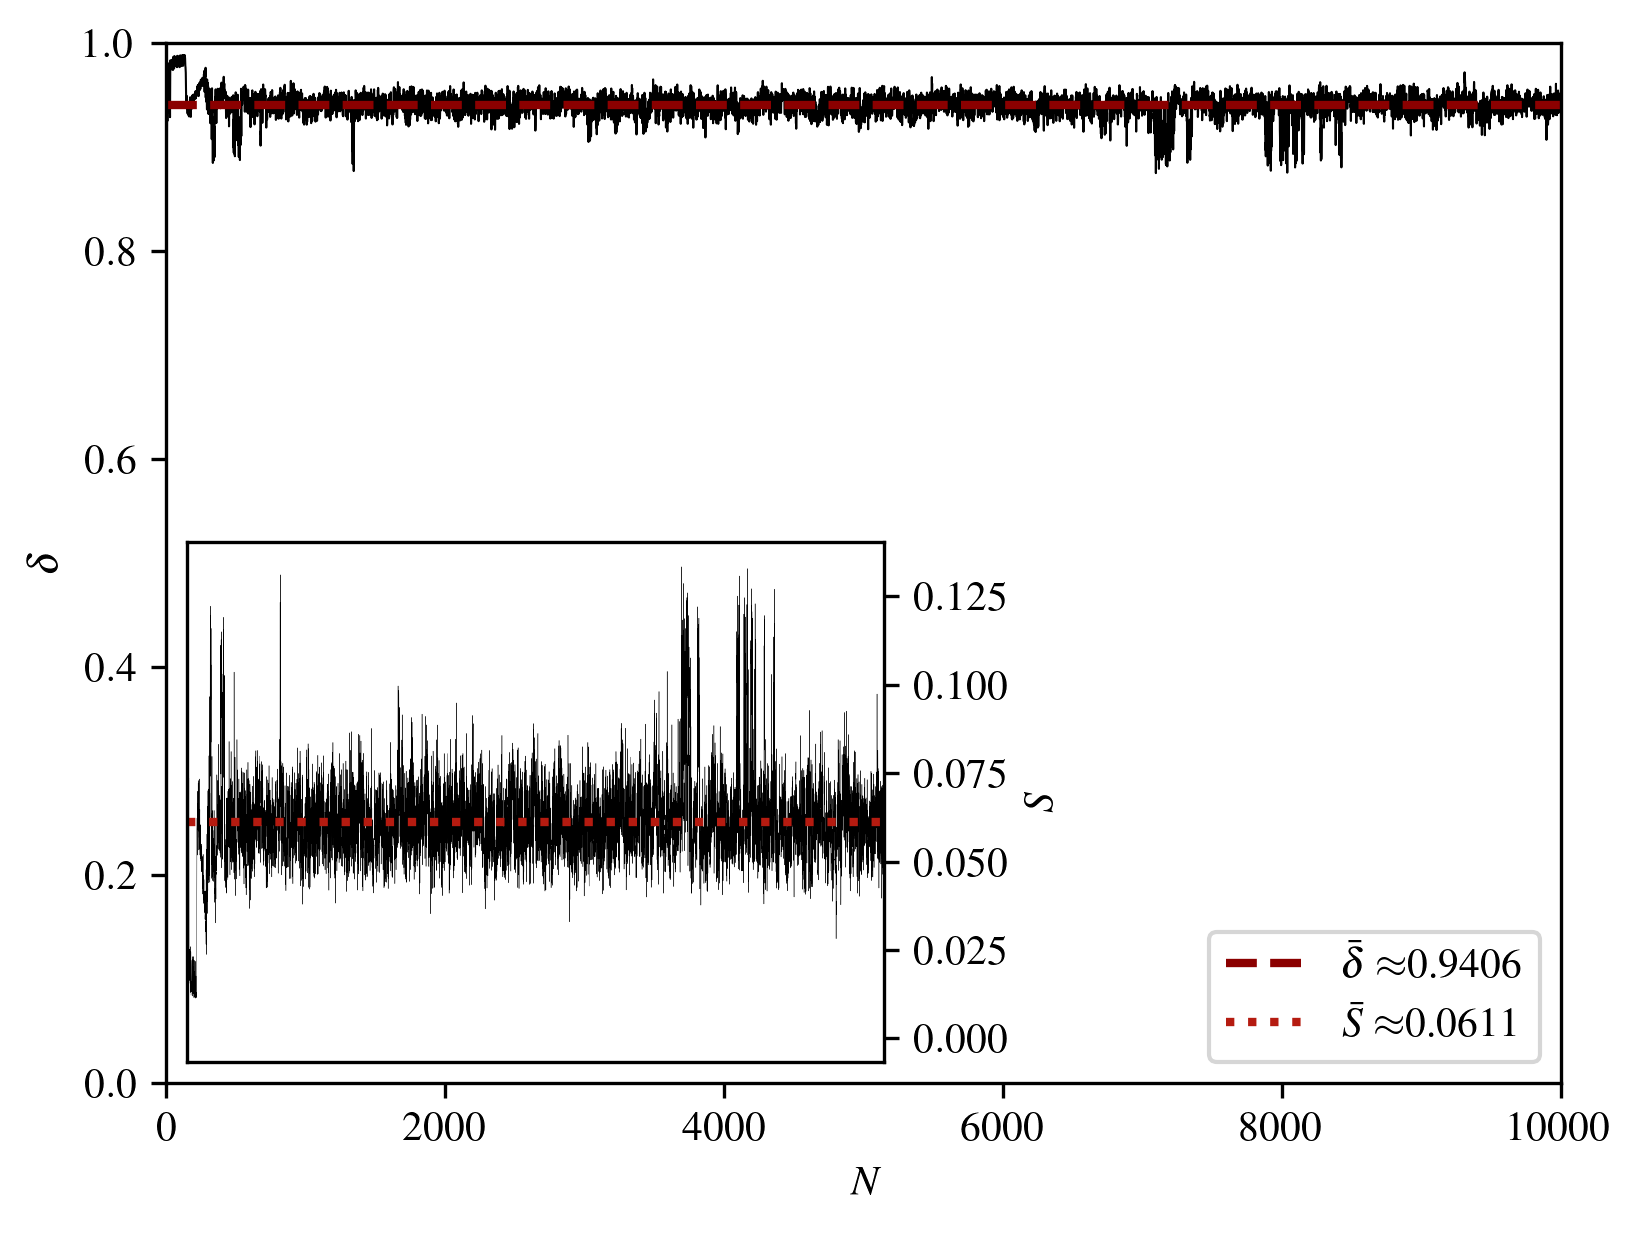

In [14]:
fig = plt.figure(figsize=(6,4.5),dpi=300)
fig.clear()
ax = fig.subplots()
# plt.title(str(n_qubits))
# ax.set_title(r'norm $\sum Q^2 = - \ln \left[ \left( \frac{3}{4} \right)^{n_q} \cdot \sum Q^2 \right]$')
ax.plot(t, normQsums,'k-', lw=0.5)
ax.set_xlim(0,T)
ax.set_xlabel(r'$N$')
ax.set_ylim(0,max(normQsums))
# ax.set_ylim(0,7)
ax.set_ylabel(r'$\delta$')
ax.plot((0,T),(avg,avg),'--', label = r'$\bar{\delta} \approx $' + str(avg)[:6],lw=2,color="darkred")
ax.plot((0,T),(1000,1000),':', label = r'$\bar{S} \approx $' + str(avgS)[:6],lw=2,color="#b51b10")
inset = inset_axes(ax,width="50%",height="50%",loc="lower left")
inset.plot(t, normentropy, 'k-', lw=0.1)
inset.plot((0,T),(avgS,avgS),':', label = r'$\bar{\delta} \approx $' + str(avg)[:6],lw=2,color="#b51b10")
inset.set_xlim(0,T)
# inset.set_ylim(1.0,1.6)
inset.set_ylabel(r'$S$')
inset.tick_params(labelleft = True,labelbottom = False, labelright = False)
inset.xaxis.set_ticks([])
# inset.yaxis.set_ticks([1,1.3,1.6])
inset.yaxis.set_label_position("right")
inset.yaxis.set_ticks_position("right")
ax.legend(loc='lower right')
# fig.savefig(savefilepath + "dim" + str(D) + "/" + str(n_qubits)+"q.png")
# ax.spines[['right','top']].set_visible(False)